##SpamSpotter: An Efficient Spammer Detection Framework based on Intelligent Decision Support System on Facebook


###Importing Required Packages/Libraries
The required libraries as well as the packages needed to use this libraries is imported.

In [ ]:
import numpy as np
import pandas as pd
import math
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats.stats import pearsonr
from sklearn import metrics
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
%matplotlib inline
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Pandas display option to show more rows and columns:

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the dataset and printing out the first 5 rows
Dataset Used: Kaggle's Facebook Spam dataset

##### Present Attribute:
-------------------------------------------
1. Number of friends
2. Number of followings
3. Number of Community
4. Age(in days) of the user account 
5. Total number of posts shared 
6. Total number of URLs shared
7. Total number of photos/videos shared 
8. Fraction of posts containing URLs
9. Fraction of posts containing photos/videos
10. Average number of comments per post
11. Average number of likes per post
12. Average number of tags in a post
13. Average number of hashtags present in a post




In [ ]:
facebook = pd.read_csv('/content/drive/MyDrive/Facebook Spam Dataset.csv')
facebook.head()

profile id  #friends  #following  #community  age  #postshared  #urlshared  #photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  #tags/post  Label
0           1        39         300         907  200         1000         850             922   0.490            0.550            0.560       0.470         40          14      1
1           2       150         350          30  300          300         100             290   0.330            0.960            0.500       1.200         10           4      0
2           3       300         450          50  465          500         150             450   0.200            0.840            0.400       1.500         15           7      0
3           4        25         110         660  350         2050        2000            2050   0.976            1.000            0.700       0.300         54          21      1
4           5        24         100         150  800          950        1000             900   1.053            0.947            0.660       0.500         55          20      1

### Inspecting column datatype and missing values

In [ ]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile id       600 non-null    int64  
 1   #friends         600 non-null    int64  
 2   #following       600 non-null    int64  
 3   #community       600 non-null    int64  
 4   age              600 non-null    int64  
 5   #postshared      600 non-null    int64  
 6   #urlshared       600 non-null    int64  
 7   #photos/videos   600 non-null    int64  
 8   fpurls           598 non-null    float64
 9   fpphotos/videos  600 non-null    float64
 10  avgcomment/post  600 non-null    float64
 11  likes/post       600 non-null    float64
 12  tags/post        600 non-null    int64  
 13  #tags/post       600 non-null    int64  
 14  Label            600 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 70.4 KB


### Replace the missing values with mean

In [ ]:
facebook = facebook.apply(lambda x: x.fillna(x.mean())) 

In [ ]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile id       600 non-null    int64  
 1   #friends         600 non-null    int64  
 2   #following       600 non-null    int64  
 3   #community       600 non-null    int64  
 4   age              600 non-null    int64  
 5   #postshared      600 non-null    int64  
 6   #urlshared       600 non-null    int64  
 7   #photos/videos   600 non-null    int64  
 8   fpurls           600 non-null    float64
 9   fpphotos/videos  600 non-null    float64
 10  avgcomment/post  600 non-null    float64
 11  likes/post       600 non-null    float64
 12  tags/post        600 non-null    int64  
 13  #tags/post       600 non-null    int64  
 14  Label            600 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 70.4 KB


### Check for duplicate rows

In [ ]:
duplicate = facebook[facebook.duplicated()]

In [ ]:
duplicate

Empty DataFrame
Columns: [profile id, #friends, #following, #community, age, #postshared, #urlshared, #photos/videos, fpurls, fpphotos/videos, avgcomment/post, likes/post, tags/post, #tags/post, Label]
Index: []

No duplicate rows present!

### Derived attribute
-------------------------------------------------

1. Average number of posts shared per day
2. Average number of URLs shared per day
3. Average number of photos/videos shared per day

In [ ]:
facebook['avgpost/day'] = facebook['#postshared'] / facebook['age']
facebook['avgURL/day'] = facebook['#urlshared'] / facebook['age']
facebook['avgphoto/day'] = facebook['#photos/videos'] / facebook['age']

In [ ]:
#added Label as last column
cols = list(facebook.columns.values)
cols.pop(cols.index('Label'))
facebook = facebook[cols+['Label']]

In [ ]:
facebook.head()

profile id  #friends  #following  #community  age  #postshared  #urlshared  #photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  #tags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0           1        39         300         907  200         1000         850             922   0.490            0.550            0.560       0.470         40          14        5.000       4.250         4.610      1
1           2       150         350          30  300          300         100             290   0.330            0.960            0.500       1.200         10           4        1.000       0.333         0.967      0
2           3       300         450          50  465          500         150             450   0.200            0.840            0.400       1.500         15           7        1.075       0.323         0.968      0
3           4        25         110         660  350         2050        2000            2050   0.976            1.000            0.700       0.300         54          21        5.857       5.714         5.857      1
4           5        24         100         150  800          950        1000             900   1.053            0.947            0.660       0.500         55          20        1.188       1.250         1.125      1

In [ ]:
## removing hashes from column names as it can conflict with python '#' syntax
facebook = facebook.rename(columns={'#friends':'friends'})
facebook = facebook.rename(columns={'#following':'following'})
facebook = facebook.rename(columns={'#community':'community'})
facebook = facebook.rename(columns={'#postshared':'postshared'})
facebook = facebook.rename(columns={'#urlshared':'urlshared'})
facebook = facebook.rename(columns={'#photos/videos':'photos/videos'})
facebook = facebook.rename(columns={'#tags/post':'Hashtags/post'})

In [ ]:
facebook.head()

profile id  friends  following  community  age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0           1       39        300        907  200        1000        850            922   0.490            0.550            0.560       0.470         40             14        5.000       4.250         4.610      1
1           2      150        350         30  300         300        100            290   0.330            0.960            0.500       1.200         10              4        1.000       0.333         0.967      0
2           3      300        450         50  465         500        150            450   0.200            0.840            0.400       1.500         15              7        1.075       0.323         0.968      0
3           4       25        110        660  350        2050       2000           2050   0.976            1.000            0.700       0.300         54             21        5.857       5.714         5.857      1
4           5       24        100        150  800         950       1000            900   1.053            0.947            0.660       0.500         55             20        1.188       1.250         1.125      1

In [ ]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile id       600 non-null    int64  
 1   friends          600 non-null    int64  
 2   following        600 non-null    int64  
 3   community        600 non-null    int64  
 4   age              600 non-null    int64  
 5   postshared       600 non-null    int64  
 6   urlshared        600 non-null    int64  
 7   photos/videos    600 non-null    int64  
 8   fpurls           600 non-null    float64
 9   fpphotos/videos  600 non-null    float64
 10  avgcomment/post  600 non-null    float64
 11  likes/post       600 non-null    float64
 12  tags/post        600 non-null    int64  
 13  Hashtags/post    600 non-null    int64  
 14  avgpost/day      600 non-null    float64
 15  avgURL/day       600 non-null    float64
 16  avgphoto/day     600 non-null    float64
 17  Label           

### sample instances from contiguous data



In [ ]:
class1=facebook.loc[facebook['Label']==0]
class2=facebook.loc[facebook['Label']==1]
cx=class1.head(20)
cy=class2.head(20)
cresult=cx.append(cy,ignore_index=True)

In [ ]:
cresult

profile id  friends  following  community   age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0            2      150        350         30   300         300        100            290   0.330            0.960            0.500       1.200         10              4        1.000       0.333         0.967      0
1            3      300        450         50   465         500        150            450   0.200            0.840            0.400       1.500         15              7        1.075       0.323         0.968      0
2            6      562        350         55   650         450        250            900   0.556            2.000            0.420       2.200         15             10        0.692       0.385         1.385      0
3            7      662        454         22   764         365        100           1000   0.274            2.740            0.310       2.500         23             10        0.478       0.131         1.309      0
4            9      800        550         66   850         460        500            300   1.087            0.652            0.400       2.000         23             10        0.541       0.588         0.353      0
5           10      605        555         58   782         700        100            650   0.143            0.929            0.240       2.800         13              5        0.895       0.128         0.831      0
6           11     1005        380         13  1250         561        132            530   0.235            0.945            0.100       1.600         16              4        0.449       0.106         0.424      0
7           12     1632        560         84   651         789         87            760   0.110            0.963            0.460       1.900         35             12        1.212       0.134         1.167      0
8           13     2461        643         63  1523         756        123            713   0.163            0.943            0.460       2.800         13             17        0.496       0.081         0.468      0
9           14      561        312         46   625         326         65            300   0.199            0.920            0.350       2.300         32             15        0.522       0.104         0.480      0
10          15     1143        426         86   956         558         56            500   0.100            0.896            0.240       2.100         15             19        0.584       0.059         0.523      0
11          16      784        466         46   423         326         32            300   0.098            0.920            0.260       2.500         18             12        0.771       0.076         0.709      0
12          17      146         56         13   125          76         23             65   0.303            0.855            0.350       1.300         19             19        0.608       0.184         0.520      0
13          18      894        465        123   565         420         63            400   0.150            0.952            0.482       1.000         25             11        0.743       0.112         0.708      0
14          19      463        143         32   421         186         50            168   0.269            0.903            0.380       1.400         23             16        0.442       0.119         0.399      0
15          20     1164        786         46   864         546         95            500   0.174            0.916            0.360       1.500         29             13        0.632       0.110         0.579      0
16          21      265        165         26   410         130         25            115   0.192            0.885            0.320       1.900         26             14        0.317       0.061         0.280      0
17          22      632        164         29   476         331         46            302   0.139            0.912  


#### In graph
#### Blue colour- represents legitimate user
#### Red colour-represents spammer

### friends vs followings


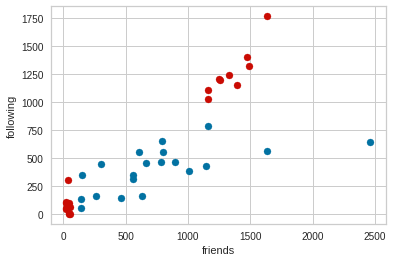

In [ ]:
idx_0 = np.where(cresult.Label == 0)
idx_1 = np.where(cresult.Label == 1)
plt.scatter(cresult.iloc[idx_0].friends, cresult.iloc[idx_0].following,  c='b', marker="o", label='legit')
plt.scatter(cresult.iloc[idx_1].friends, cresult.iloc[idx_1].following,  c='r', marker="o", label='spam')
plt.ylabel('following')
plt.xlabel('friends')
plt.show()

### posts vs urls shared

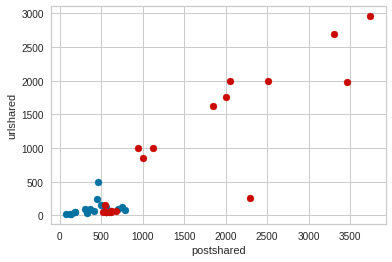

In [ ]:
idx_0 = np.where(cresult.Label == 0)
idx_1 = np.where(cresult.Label == 1)
plt.scatter(cresult.iloc[idx_0].postshared, cresult.iloc[idx_0].urlshared,  c='b', marker="o", label='legit')
plt.scatter(cresult.iloc[idx_1].postshared, cresult.iloc[idx_1].urlshared,  c='r', marker="o", label='spam')
plt.ylabel('urlshared')
plt.xlabel('postshared')
plt.show()

### Posts vs photos/videos shared

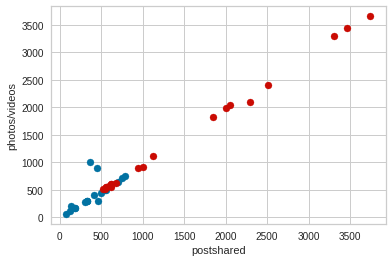

In [ ]:
idx_0 = np.where(cresult.Label == 0)
idx_1 = np.where(cresult.Label == 1)
plt.scatter(cresult.iloc[idx_0].postshared, cresult.iloc[idx_0]['photos/videos'],  c='b', marker="o", label='legit')
plt.scatter(cresult.iloc[idx_1].postshared, cresult.iloc[idx_1]['photos/videos'],  c='r', marker="o", label='spam')
plt.ylabel('photos/videos')
plt.xlabel('postshared')
plt.show()

 Here we obsereve that Mostly the post shared is either photos/videos therefore follows postive correlation and also  we can see that the variation in range of posts shared between the classes.

## sample instances from non contigious data

In [ ]:
ncx=class1.sample(20)
ncy=class2.sample(20)
ncresult=ncx.append(ncy,ignore_index=True)

In [ ]:
ncresult

profile id  friends  following  community   age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  tags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0          499     1407       1231         59  1153         503        250            487   0.497            0.968            0.523       0.960         40         16        0.436       0.217         0.422      0
1          189     1211        911         27  1167        1181         57           1036   0.048            0.877            0.411       1.090         58         18        1.012       0.049         0.888      0
2           96     1019        693         43   837         743         41            651   0.055            0.876            0.590       0.930         19         11        0.888       0.049         0.778      0
3          273     1250       1247         50  1302        1156         37           1140   0.032            0.986            0.789       0.456         48         20        0.888       0.028         0.876      0
4          328     1482       1582         45  1350        1330         35           1320   0.026            0.992            0.326       0.214         45         20        0.985       0.026         0.978      0
5          124      846        863         19   849        1113         49            812   0.044            0.730            0.650       0.730         65         17        1.311       0.058         0.956      0
6          433     1325       1456         59  1022         759         48            752   0.063            0.991            0.236       1.560         49          4        0.743       0.047         0.736      0
7          181     1329        744         99  1943        1712         71           1683   0.041            0.983            0.334       0.920         66          8        0.881       0.037         0.866      0
8          435     1694       1565         56  1044         546         35            521   0.064            0.954            0.123       1.980         45         19        0.523       0.034         0.499      0
9           78      331        456         26   786         689         58            652   0.084            0.946            0.456       1.600         38         18        0.877       0.074         0.830      0
10         342     1365       1470         47  1436        1420         47           1398   0.033            0.985            0.654       0.256         21          3        0.989       0.033         0.974      0
11         425      856        956         41   952         748         57            654   0.076            0.874            0.147       1.050         45         15        0.786       0.060         0.687      0
12         408     1345       1965         16  1552         546         38            521   0.070            0.954            0.530       0.960         15         11        0.352       0.024         0.336      0
13         289     1456       1430         35  1230        1330         32           1310   0.024            0.985            0.745       0.258         14          1        1.081       0.026         1.065      0
14         441      865        789         14   984         564         35            523   0.062            0.927            0.455       1.250         48         11        0.573       0.036         0.532      0
15          81     1234       2146         39   846         486         28            470   0.058            0.967            0.330       0.980         34          6        0.574       0.033         0.556      0
16          68     1395       1234         66  1392         632         73            600   0.116            0.949            0.360       1.100         22          9        0.454       0.052         0.431      0
17          74      751        921         56  1364         663         66            883   0.100            1.332            0.410       0.860         45         18        0.486       0.0

### friends vs following

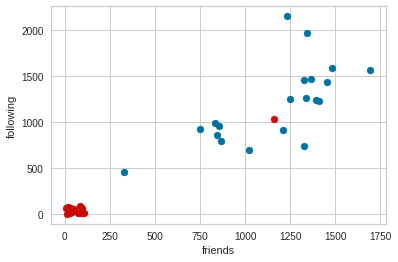

In [ ]:
idx_0 = np.where(ncresult.Label == 0)
idx_1 = np.where(ncresult.Label == 1)
plt.scatter(ncresult.iloc[idx_0].friends, ncresult.iloc[idx_0].following,  c='b', marker="o", label='legit')
plt.scatter(ncresult.iloc[idx_1].friends, ncresult.iloc[idx_1].following,  c='r', marker="o", label='spam')
plt.ylabel('following')
plt.xlabel('friends')
plt.show()

### posts vs urls shared

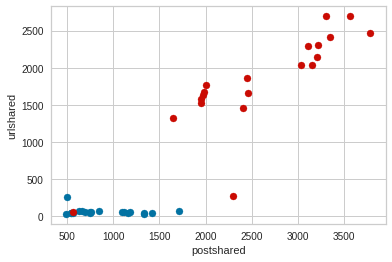

In [ ]:
idx_0 = np.where(ncresult.Label == 0)
idx_1 = np.where(ncresult.Label == 1)
plt.scatter(ncresult.iloc[idx_0].postshared, ncresult.iloc[idx_0].urlshared,  c='b', marker="o", label='legit')
plt.scatter(ncresult.iloc[idx_1].postshared, ncresult.iloc[idx_1].urlshared,  c='r', marker="o", label='spam')
plt.ylabel('urlshared')
plt.xlabel('postshared')
plt.show()

### posts vs photos/videos shrared

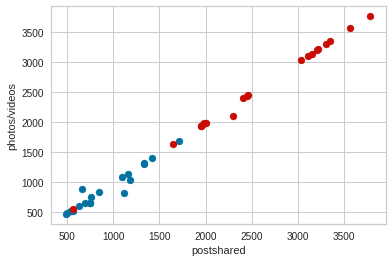

In [ ]:
idx_0 = np.where(ncresult.Label == 0)
idx_1 = np.where(ncresult.Label == 1)
plt.scatter(ncresult.iloc[idx_0].postshared, ncresult.iloc[idx_0]['photos/videos'],  c='b', marker="o", label='legit')
plt.scatter(ncresult.iloc[idx_1].postshared, ncresult.iloc[idx_1]['photos/videos'],  c='r', marker="o", label='spam')
plt.ylabel('photos/videos')
plt.xlabel('postshared')
plt.show()

From the above graphs we observe that on comparing both contigous data and non contigous data the results are moreless same. 

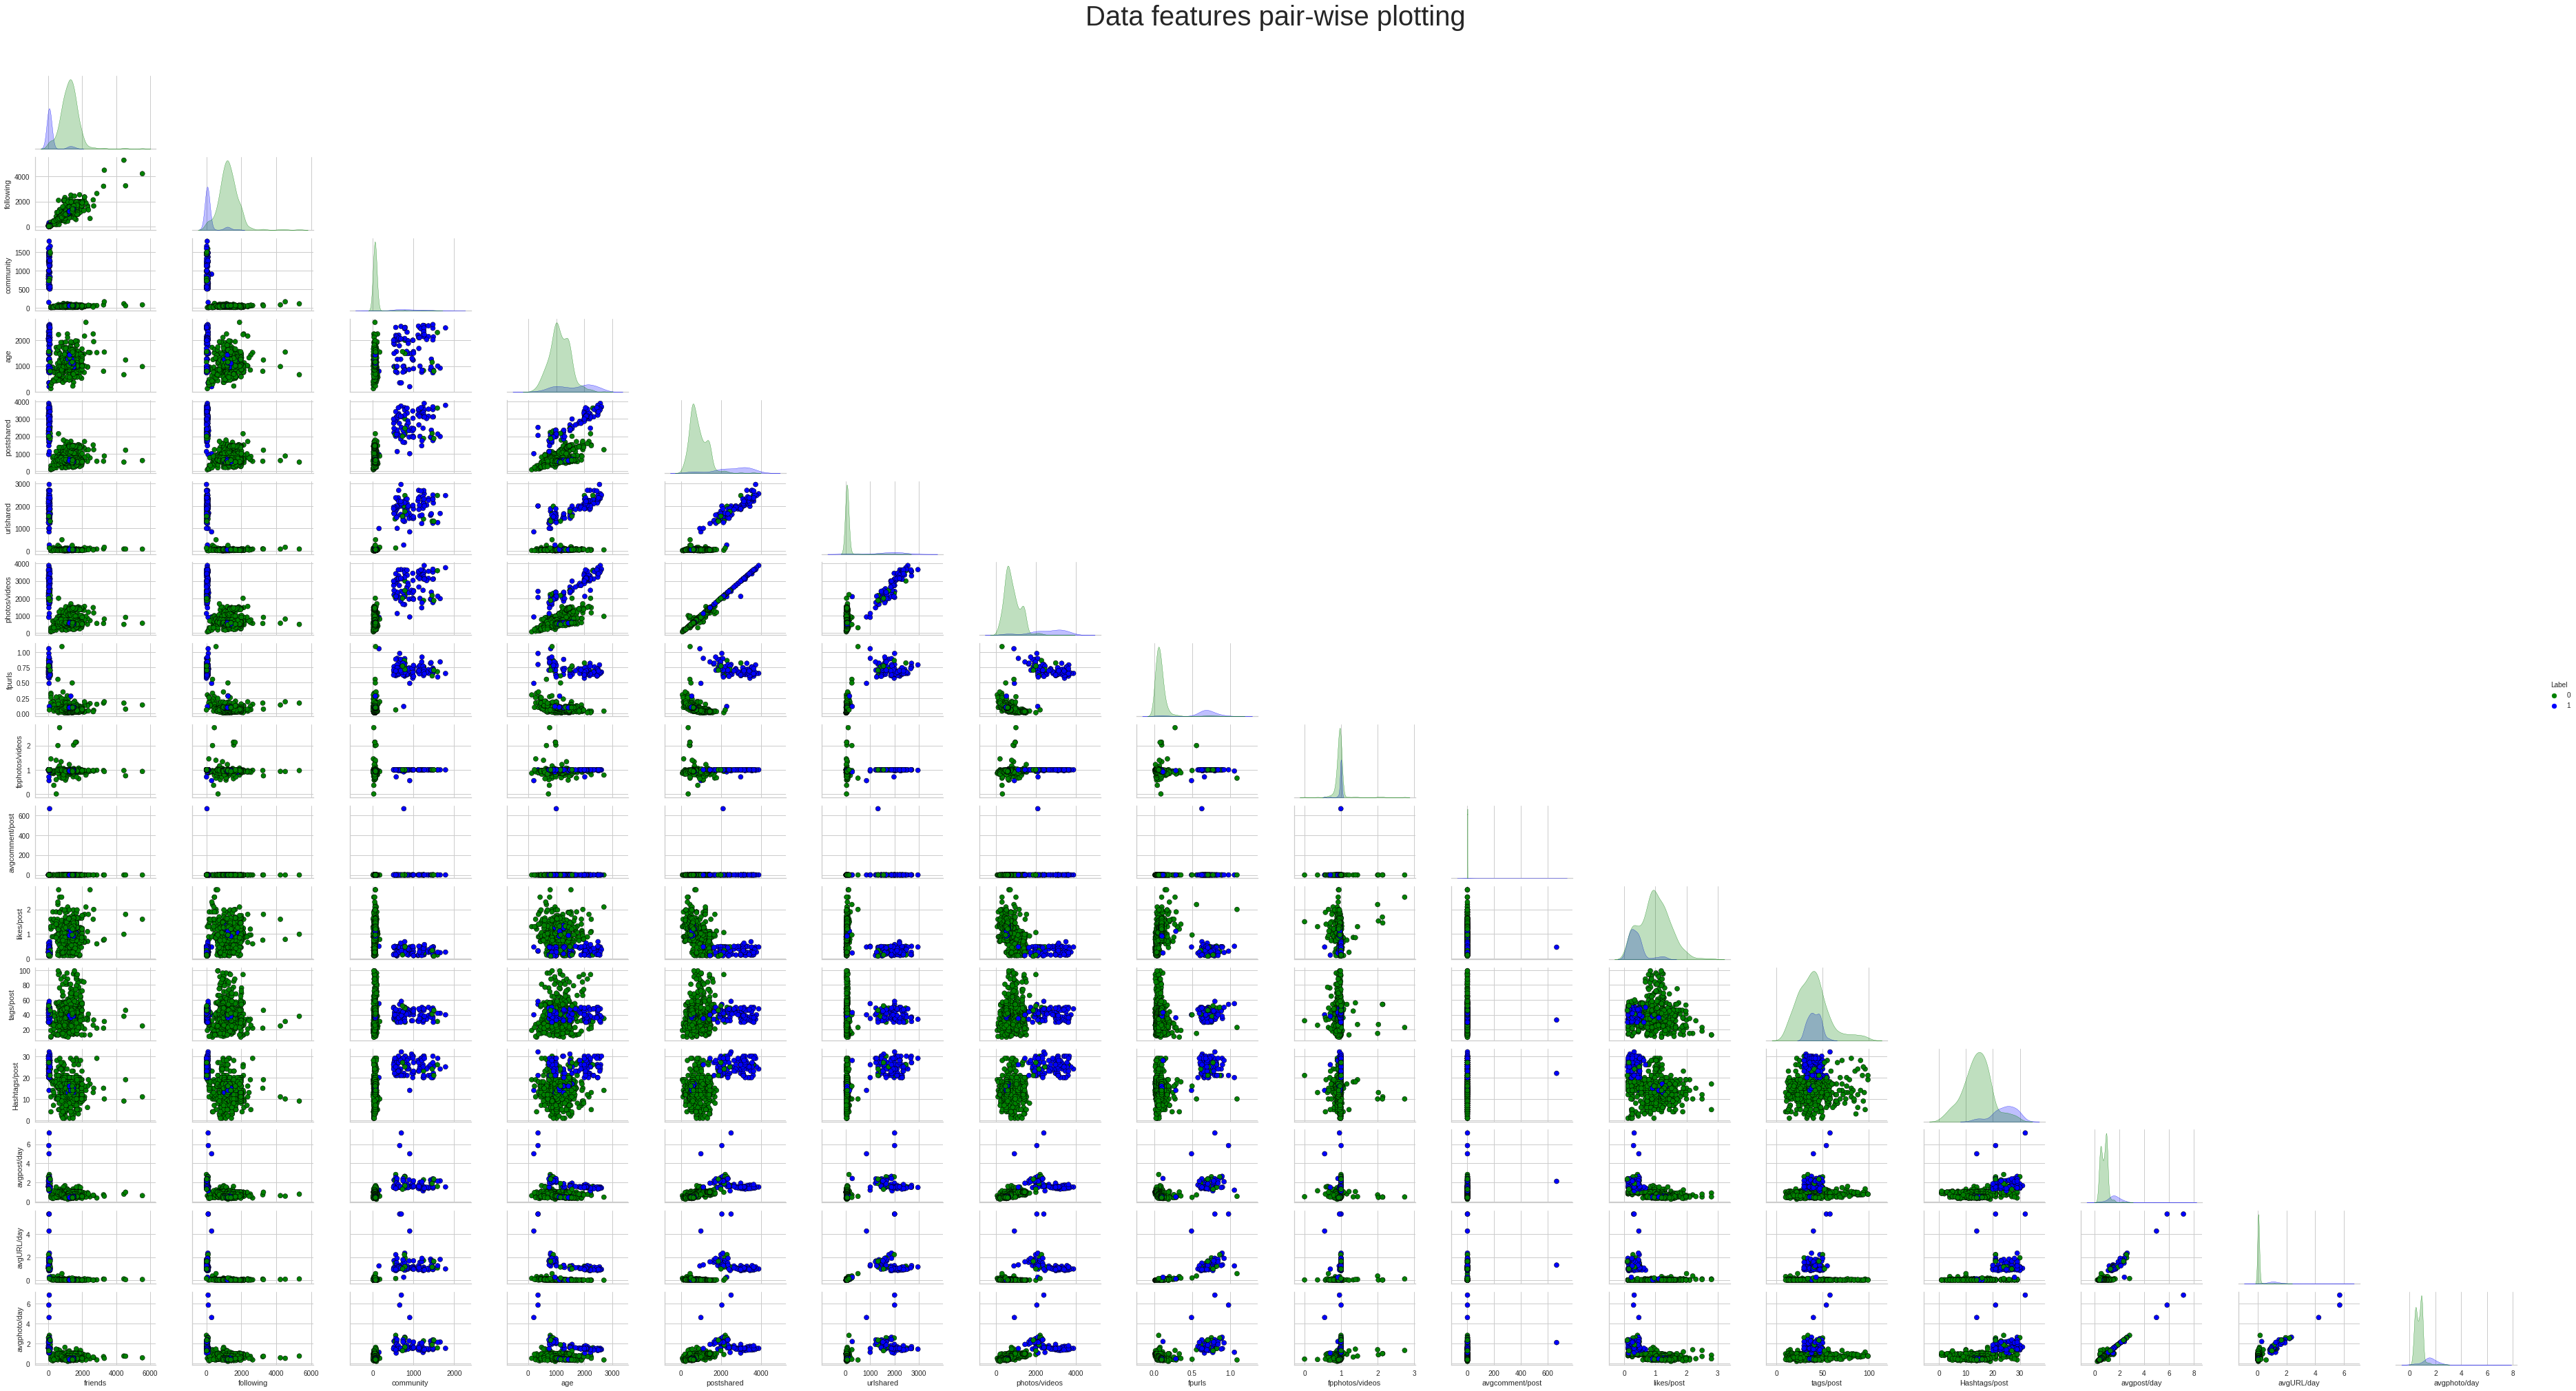

In [ ]:
#green : legit, blue : spam
col = ['friends', 'following', 'community', 'age', 'postshared', 'urlshared', 'photos/videos', 'fpurls', 'fpphotos/videos', 'avgcomment/post','likes/post', 'tags/post', 'Hashtags/post',	'avgpost/day',	'avgURL/day',	'avgphoto/day', 'Label']
p = sns.pairplot(facebook[col], hue='Label', palette={0: "#008000", 1: "#0000FF"}, size=1.8, aspect=1.8,plot_kws=dict(edgecolor="black", linewidth=0.5), corner = True)
fig = p.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Data features pair-wise plotting', fontsize=40)

### Normalization



In [ ]:
facebook.describe()

profile id  friends  following  community      age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day   Label
count     600.000  600.000    600.000    600.000  600.000     600.000    600.000        600.000 600.000          600.000          600.000     600.000    600.000        600.000      600.000     600.000       600.000 600.000
mean      301.175 1066.355   1068.670    207.647 1214.605    1158.115    369.750       1120.783   0.188            0.961            1.589       0.881     40.060         16.002        0.940       0.273         0.906   0.172
std       173.730  669.498    677.262    370.622  471.262     835.521    720.085        836.186   0.251            0.145           27.130       0.504     15.958          6.434        0.585       0.579         0.578   0.377
min         1.000    4.000      1.000     12.000  125.000      76.000     11.000         65.000   0.011            0.000            0.000       0.102     10.000          1.000        0.235       0.011         0.210   0.000
25%       150.750  663.500    658.000     39.000  926.500     588.250     38.000        563.750   0.042            0.931            0.267       0.456     30.000         12.000        0.549       0.034         0.519   0.000
50%       301.500 1159.000   1132.000     56.000 1136.000     876.500     49.000        826.500   0.077            0.970            0.456       0.880     39.000         15.500        0.878       0.046         0.829   0.000
75%       451.250 1473.750   1473.750     77.000 1452.250    1410.000     83.000       1380.000   0.135            0.993            0.630       1.230     47.000         19.250        1.002       0.091         0.982   0.000
max       601.000 5554.000   5312.000   1789.000 2697.000    3896.000   2956.000       3891.000   1.087            2.740          665.000       2.800     99.000         32.000        7.177       5.714         6.857   1.000

The value range of all the variable are different. So we need normalization

In [ ]:
result = facebook.copy()
for feature_name in facebook.columns:
    max_value = facebook[feature_name].max()
    min_value = facebook[feature_name].min()
    result[feature_name] = (facebook[feature_name] - min_value) / (max_value - min_value)

In [ ]:
result.head()

profile id  friends  following  community   age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0       0.000    0.006      0.056      0.504 0.029       0.242      0.285          0.224   0.445            0.201            0.001       0.136      0.337          0.419        0.686       0.743         0.662  1.000
1       0.002    0.026      0.066      0.010 0.068       0.059      0.030          0.059   0.296            0.350            0.001       0.407      0.000          0.097        0.110       0.056         0.114  0.000
2       0.003    0.053      0.085      0.021 0.132       0.111      0.047          0.101   0.175            0.307            0.001       0.518      0.056          0.194        0.121       0.055         0.114  0.000
3       0.005    0.004      0.021      0.365 0.087       0.517      0.675          0.519   0.896            0.365            0.001       0.073      0.494          0.645        0.810       1.000         0.850  1.000
4       0.007    0.004      0.019      0.078 0.262       0.229      0.336          0.218   0.968            0.346            0.001       0.148      0.506          0.613        0.137       0.217         0.138  1.000

### Understanding pair wise correlation of all columns

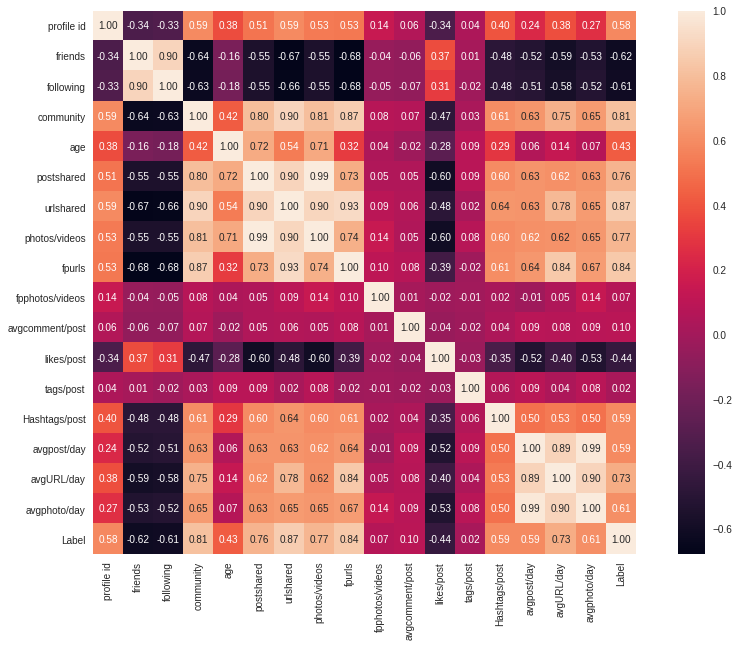

In [ ]:
corr = result.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

Highly correlated variables have multicollinearity(>0.95): postshared and photos/videos are highly correlated and avgphoto/day and avgpost/day are highly correlated.

In [ ]:
result = result.drop('profile id', axis = 1) #just a reference

# Observing  correlation using scatter plot

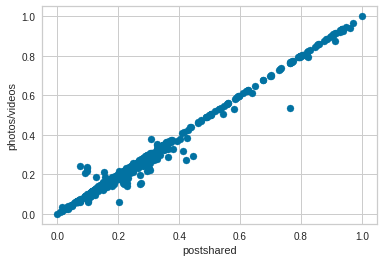

In [ ]:
x=result['postshared']
y=result['photos/videos']
plt.scatter(x,y)
plt.xlabel('postshared')
plt.ylabel('photos/videos')
plt.show()

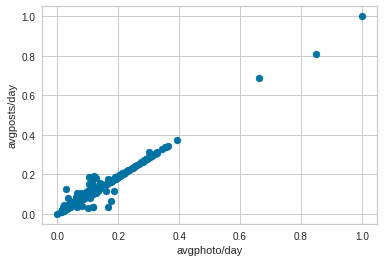

In [ ]:
x=result['avgphoto/day']
y=result['avgpost/day']
plt.scatter(x,y)
plt.xlabel('avgphoto/day')
plt.ylabel('avgposts/day')
plt.show()

### Pearson correlation

The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

In [ ]:
x=result['postshared']
y=result['photos/videos']
c,p_value=pearsonr(x,y)

In [ ]:
c

0.9935360009363765

In [ ]:
p_value

0.0

In [ ]:
x=result['avgphoto/day']
y=result['avgpost/day']
c,p_value=pearsonr(x,y)

In [ ]:
c

0.9856358221110136

In [ ]:
p_value

0.0

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   friends          600 non-null    float64
 1   following        600 non-null    float64
 2   community        600 non-null    float64
 3   age              600 non-null    float64
 4   postshared       600 non-null    float64
 5   urlshared        600 non-null    float64
 6   photos/videos    600 non-null    float64
 7   fpurls           600 non-null    float64
 8   fpphotos/videos  600 non-null    float64
 9   avgcomment/post  600 non-null    float64
 10  likes/post       600 non-null    float64
 11  tags/post        600 non-null    float64
 12  Hashtags/post    600 non-null    float64
 13  avgpost/day      600 non-null    float64
 14  avgURL/day       600 non-null    float64
 15  avgphoto/day     600 non-null    float64
 16  Label            600 non-null    float64
dtypes: float64(17)
m

## Principal component Analysis(PCA)







In [ ]:
x=result[['postshared','photos/videos','avgphoto/day','avgpost/day']]
x

postshared  photos/videos  avgphoto/day  avgpost/day
0         0.242          0.224         0.662        0.686
1         0.059          0.059         0.114        0.110
2         0.111          0.101         0.114        0.121
3         0.517          0.519         0.850        0.810
4         0.229          0.218         0.138        0.137
..          ...            ...           ...          ...
595       0.764          0.765         0.193        0.182
596       0.875          0.876         0.174        0.163
597       0.489          0.489         0.292        0.277
598       0.471          0.473         0.321        0.304
599       0.504          0.506         0.161        0.151

[600 rows x 4 columns]

### considering two components

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) 
pc = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
pc.head()

principal component 1  principal component 2
0                  0.148                  0.797
1                 -0.298                  0.094
2                 -0.232                  0.084
3                  0.594                  0.904
4                 -0.064                  0.068

### considering three components

In [ ]:
pca = PCA(n_components=3)
principalComponents1 = pca.fit_transform(x) 
pc1 = pd.DataFrame(data = principalComponents1 , columns = ['principal component 1', 'principal component 2','principal component3'])
pc1.head()

principal component 1  principal component 2  principal component3
0                  0.148                  0.797                 0.021
1                 -0.298                  0.094                -0.005
2                 -0.232                  0.084                 0.005
3                  0.594                  0.904                -0.011
4                 -0.064                  0.068                 0.003

### considering four components

In [ ]:
pca = PCA(n_components=4)
principalComponents2 = pca.fit_transform(x) 
pc2 = pd.DataFrame(data = principalComponents2 , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
pc2.head()

principal component 1  principal component 2  principal component 3  principal component 4
0                  0.148                  0.797                  0.021                 -0.017
1                 -0.298                  0.094                 -0.005                 -0.001
2                 -0.232                  0.084                  0.005                 -0.004
3                  0.594                  0.904                 -0.011                  0.012
4                 -0.064                  0.068                  0.003                 -0.000

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.22469429e-01 7.37901460e-02 3.63595717e-03 1.04468076e-04]


### creating a copy

In [ ]:
Presult=  result.copy()
Presult = Presult.drop('postshared', axis=1)
Presult = Presult.drop('photos/videos', axis=1)
Presult = Presult.drop('avgphoto/day', axis=1) 
Presult = Presult.drop('avgpost/day', axis=1) 
Presult

friends  following  community   age  urlshared  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgURL/day  Label
0      0.006      0.056      0.504 0.029      0.285   0.445            0.201            0.001       0.136      0.337          0.419       0.743  1.000
1      0.026      0.066      0.010 0.068      0.030   0.296            0.350            0.001       0.407      0.000          0.097       0.056  0.000
2      0.053      0.085      0.021 0.132      0.047   0.175            0.307            0.001       0.518      0.056          0.194       0.055  0.000
3      0.004      0.021      0.365 0.087      0.675   0.896            0.365            0.001       0.073      0.494          0.645       1.000  1.000
4      0.004      0.019      0.078 0.262      0.336   0.968            0.346            0.001       0.148      0.506          0.613       0.217  1.000
..       ...        ...        ...   ...        ...     ...              ...              ...         ...        ...            ...         ...    ...
595    0.014      0.005      0.280 0.729      0.633   0.572            0.365            0.001       0.019      0.438          0.806       0.163  1.000
596    0.016      0.005      0.310 0.923      0.799   0.632            0.364            0.001       0.023      0.416          0.774       0.164  1.000
597    0.005      0.005      0.556 0.301      0.512   0.716            0.363            0.002       0.007      0.393          0.710       0.294  1.000
598    0.017      0.005      0.837 0.262      0.444   0.644            0.365            0.002       0.000      0.404          0.645       0.287  0.000
599    0.004      0.003      0.404 0.558      0.521   0.707            0.365            0.001       0.018      0.472          0.839       0.172  0.000

[600 rows x 13 columns]

### comparing different principal components (out of 4) using SVM Model

### For two components

In [ ]:
Presult1 = pd.concat([Presult,pc], axis=1)
y = Presult1['Label'] # target variable
X = Presult1.drop('Label', axis=1)
Presult1

friends  following  community   age  urlshared  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgURL/day  Label  principal component 1  principal component 2
0      0.006      0.056      0.504 0.029      0.285   0.445            0.201            0.001       0.136      0.337          0.419       0.743  1.000                  0.148                  0.797
1      0.026      0.066      0.010 0.068      0.030   0.296            0.350            0.001       0.407      0.000          0.097       0.056  0.000                 -0.298                  0.094
2      0.053      0.085      0.021 0.132      0.047   0.175            0.307            0.001       0.518      0.056          0.194       0.055  0.000                 -0.232                  0.084
3      0.004      0.021      0.365 0.087      0.675   0.896            0.365            0.001       0.073      0.494          0.645       1.000  1.000                  0.594                  0.904
4      0.004      0.019      0.078 0.262      0.336   0.968            0.346            0.001       0.148      0.506          0.613       0.217  1.000                 -0.064                  0.068
..       ...        ...        ...   ...        ...     ...              ...              ...         ...        ...            ...         ...    ...                    ...                    ...
595    0.014      0.005      0.280 0.729      0.633   0.572            0.365            0.001       0.019      0.438          0.806       0.163  1.000                  0.693                 -0.064
596    0.016      0.005      0.310 0.923      0.799   0.632            0.364            0.001       0.023      0.416          0.774       0.164  1.000                  0.838                 -0.131
597    0.005      0.005      0.556 0.301      0.512   0.716            0.363            0.002       0.007      0.393          0.710       0.294  1.000                  0.353                  0.170
598    0.017      0.005      0.837 0.262      0.444   0.644            0.365            0.002       0.000      0.404          0.645       0.287  0.000                  0.340                  0.214
599    0.004      0.003      0.404 0.558      0.521   0.707            0.365            0.001       0.018      0.472          0.839       0.172  0.000                  0.327                 -0.011

[600 rows x 15 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
param_grid = {'C': list(range(1, 10)), 'gamma': ['scale', 'auto'],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] .................... C=1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.5s finished


In [ ]:
grid_predictions = grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

Accuracy: 0.975


### For three components

In [ ]:
Presult2 = pd.concat([Presult,pc1], axis=1)
y = Presult2['Label'] # target variable
X = Presult2.drop('Label', axis=1)
Presult2

friends  following  community   age  urlshared  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgURL/day  Label  principal component 1  principal component 2  principal component3
0      0.006      0.056      0.504 0.029      0.285   0.445            0.201            0.001       0.136      0.337          0.419       0.743  1.000                  0.148                  0.797                 0.021
1      0.026      0.066      0.010 0.068      0.030   0.296            0.350            0.001       0.407      0.000          0.097       0.056  0.000                 -0.298                  0.094                -0.005
2      0.053      0.085      0.021 0.132      0.047   0.175            0.307            0.001       0.518      0.056          0.194       0.055  0.000                 -0.232                  0.084                 0.005
3      0.004      0.021      0.365 0.087      0.675   0.896            0.365            0.001       0.073      0.494          0.645       1.000  1.000                  0.594                  0.904                -0.011
4      0.004      0.019      0.078 0.262      0.336   0.968            0.346            0.001       0.148      0.506          0.613       0.217  1.000                 -0.064                  0.068                 0.003
..       ...        ...        ...   ...        ...     ...              ...              ...         ...        ...            ...         ...    ...                    ...                    ...                   ...
595    0.014      0.005      0.280 0.729      0.633   0.572            0.365            0.001       0.019      0.438          0.806       0.163  1.000                  0.693                 -0.064                -0.006
596    0.016      0.005      0.310 0.923      0.799   0.632            0.364            0.001       0.023      0.416          0.774       0.164  1.000                  0.838                 -0.131                -0.005
597    0.005      0.005      0.556 0.301      0.512   0.716            0.363            0.002       0.007      0.393          0.710       0.294  1.000                  0.353                  0.170                -0.006
598    0.017      0.005      0.837 0.262      0.444   0.644            0.365            0.002       0.000      0.404          0.645       0.287  0.000                  0.340                  0.214                -0.008
599    0.004      0.003      0.404 0.558      0.521   0.707            0.365            0.001       0.018      0.472          0.839       0.172  0.000                  0.327                 -0.011                -0.007

[600 rows x 16 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
param_grid = {'C': list(range(1, 10)), 'gamma': ['scale', 'auto'],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] .................... C=1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=2, gamma=scale, kernel=linear .................................
[CV] .................. C=2, gamma=scale, kernel=linear, total=   0.0s
[CV] C=2, gamma=scale, kernel=linear .................................
[CV] .................. C=2, gamma=scale, kernel=linear, total=   0.0s
[CV] C=2, gamma=scale, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.3s finished


In [ ]:
grid_predictions = grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

Accuracy: 0.9666666666666667


### For four components

In [ ]:
Presult3 = pd.concat([Presult,pc2], axis=1)
y = Presult3['Label'] # target variable
X = Presult3.drop('Label', axis=1)
Presult3

friends  following  community   age  urlshared  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgURL/day  Label  principal component 1  principal component 2  principal component 3  principal component 4
0      0.006      0.056      0.504 0.029      0.285   0.445            0.201            0.001       0.136      0.337          0.419       0.743  1.000                  0.148                  0.797                  0.021                 -0.017
1      0.026      0.066      0.010 0.068      0.030   0.296            0.350            0.001       0.407      0.000          0.097       0.056  0.000                 -0.298                  0.094                 -0.005                 -0.001
2      0.053      0.085      0.021 0.132      0.047   0.175            0.307            0.001       0.518      0.056          0.194       0.055  0.000                 -0.232                  0.084                  0.005                 -0.004
3      0.004      0.021      0.365 0.087      0.675   0.896            0.365            0.001       0.073      0.494          0.645       1.000  1.000                  0.594                  0.904                 -0.011                  0.012
4      0.004      0.019      0.078 0.262      0.336   0.968            0.346            0.001       0.148      0.506          0.613       0.217  1.000                 -0.064                  0.068                  0.003                 -0.000
..       ...        ...        ...   ...        ...     ...              ...              ...         ...        ...            ...         ...    ...                    ...                    ...                    ...                    ...
595    0.014      0.005      0.280 0.729      0.633   0.572            0.365            0.001       0.019      0.438          0.806       0.163  1.000                  0.693                 -0.064                 -0.006                 -0.002
596    0.016      0.005      0.310 0.923      0.799   0.632            0.364            0.001       0.023      0.416          0.774       0.164  1.000                  0.838                 -0.131                 -0.005                 -0.003
597    0.005      0.005      0.556 0.301      0.512   0.716            0.363            0.002       0.007      0.393          0.710       0.294  1.000                  0.353                  0.170                 -0.006                  0.002
598    0.017      0.005      0.837 0.262      0.444   0.644            0.365            0.002       0.000      0.404          0.645       0.287  0.000                  0.340                  0.214                 -0.008                  0.002
599    0.004      0.003      0.404 0.558      0.521   0.707            0.365            0.001       0.018      0.472          0.839       0.172  0.000                  0.327                 -0.011                 -0.007                 -0.001

[600 rows x 17 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
param_grid = {'C': list(range(1, 10)), 'gamma': ['scale', 'auto'],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] .................... C=1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .................. C=1, gamma=auto, kernel=sigmoid, total=   0.0s
[CV] C=2, gamma=scale, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.3s finished


In [ ]:
grid_predictions = grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

Accuracy: 0.9583333333333334


### comparing w.r.t accuracy

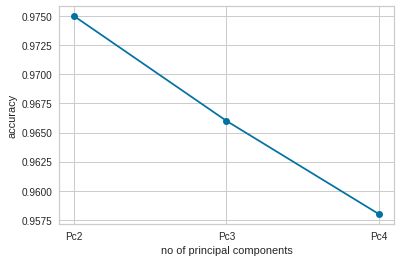

In [ ]:
c=['Pc2','Pc3','Pc4',]
v=[0.975,0.966,0.958]
plt.plot(c, v,marker='o')
plt.xlabel('no of principal components')
plt.ylabel('accuracy')
plt.show()

on comparing the accuracy of all the three cases ,the first case where we considered first two principal components gives better accuracy score than other two.so it is best to use first two principal components for better predictions and further process.The same observation can also explained using variance.

### Variance

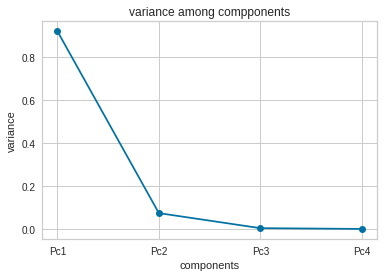

In [ ]:
P = ['Pc1','Pc2','Pc3','Pc4']
y = [9.22469429e-01, 7.37901460e-02, 3.63595717e-03, 1.04468076e-04]
plt.plot(P, y,marker='o')
plt.title('variance among compponents')
plt.xlabel('components')
plt.ylabel('variance')
plt.show()

A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. Here, we can see that after the second principal component the change in variance almost diminishes. Therefore, first two components can be selected.

Saving dataframe as csv

In [ ]:
Presult1.to_csv('/content/drive/MyDrive/cybersec/file1.csv')

### Separating our data into target and explanatory variables:

In [ ]:
y = Presult1['Label'] # target variable
X = Presult1.drop('Label', axis=1) # explanatory variables
print(y.shape)
print(X.shape)

(600,)
(600, 14)


In [ ]:
# Class balance:
y.value_counts()

0.000    497
1.000    103
Name: Label, dtype: int64

### Spliting the data into train set and test set in 80:20 ratio:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(480, 14) (120, 14)
(480,) (120,)


### Building the models:
#### 10 fold cross validation
##### Support vector machine classifier:


In [ ]:
param_grid = {'C': list(range(1, 10)), 'gamma': ['scale', 'auto'],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(SVC(),param_grid,cv = kfold, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    4.6s finished


In [ ]:
print(grid.best_score_)

0.9729166666666667


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        95
         1.0       0.91      0.80      0.85        25

    accuracy                           0.94       120
   macro avg       0.93      0.89      0.91       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted Label')

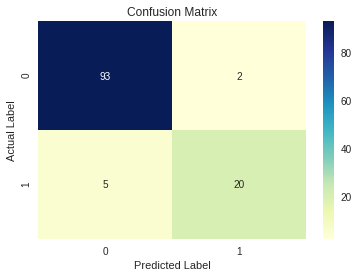

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

##### Random forest classifier

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': list(range(1, 10)), 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [2, 3, 5, 10], 'criterion' :['gini', 'entropy']}
rfc = ensemble.RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(rfc, param_grid = param_grid, cv = kfold, refit = True, verbose = 2)
grid.fit(X_train, y_train);
print(grid.best_estimator_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] boots

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_est

[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   17.3s finished


In [ ]:
print(grid.best_score_)

0.975


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        95
         1.0       0.91      0.80      0.85        25

    accuracy                           0.94       120
   macro avg       0.93      0.89      0.91       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted Label')

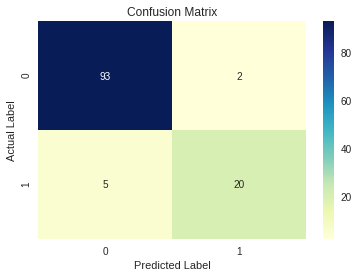

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

##### Logistic Regression

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['l1','l2', 'elasticnet', 'none']}
logReg = LogisticRegression()
kfold = KFold(n_splits=10, random_state=3)
grid=GridSearchCV(logReg, param_grid = param_grid, cv = kfold, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    9.8s finished


In [ ]:
print(grid.best_score_)

0.9729166666666667


              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        95
         1.0       0.90      0.76      0.83        25

    accuracy                           0.93       120
   macro avg       0.92      0.87      0.89       120
weighted avg       0.93      0.93      0.93       120



Text(0.5, 15.0, 'Predicted Label')

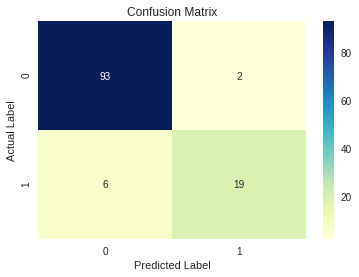

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

##### K nearest neighbours

In [ ]:
param_grid = {'n_neighbors': list(range(1, 31)), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':list(range(1, 10))}
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(knn, param_grid = param_grid, cv = kfold, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=26, weights=uniform ...
[CV]  algorithm=brute, le

[Parallel(n_jobs=1)]: Done 21600 out of 21600 | elapsed:  2.7min finished


In [ ]:
print(grid.best_score_)

0.975


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        95
         1.0       0.91      0.80      0.85        25

    accuracy                           0.94       120
   macro avg       0.93      0.89      0.91       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted Label')

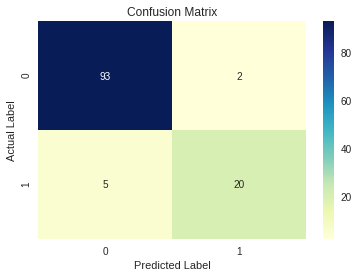

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion':['gini','entropy']}
dtc = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(dtc, param_grid = param_grid, cv = kfold, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ...................... criterion=gini, max_depth=7, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.6s finished


In [ ]:
print(grid.best_score_)

0.9520833333333334


              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        92
         1.0       0.92      0.79      0.85        28

    accuracy                           0.93       120
   macro avg       0.93      0.88      0.90       120
weighted avg       0.93      0.93      0.93       120



Text(0.5, 15.0, 'Predicted Label')

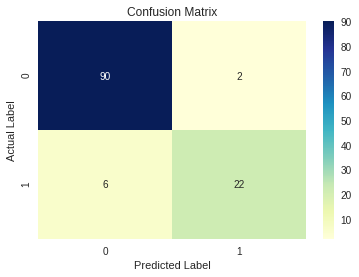

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing':[1e-09]}
kfold = KFold(n_splits=10, random_state=3)
gnb = GaussianNB()
grid = GridSearchCV(gnb, param_grid = param_grid, cv = kfold, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
print(grid.best_score_)

0.9625


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        92
         1.0       0.96      0.89      0.93        28

    accuracy                           0.97       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.97      0.97      0.97       120



Text(0.5, 15.0, 'Predicted Label')

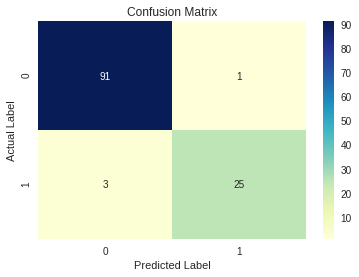

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### External testing
##### Support vector machine classifier:

In [ ]:
param_grid = {'C': list(range(1, 10)), 'gamma': ['scale', 'auto'],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(probability=True),param_grid, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .................. C=1, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] .................... C=1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] ................. C=1, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    6.8s finished


In [ ]:
print(grid.best_score_)

0.9625


--- 0.001619100570678711 seconds ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        96
         1.0       0.96      0.96      0.96        24

    accuracy                           0.98       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.98      0.98       120

******AUC Curve********
AUC: 0.990


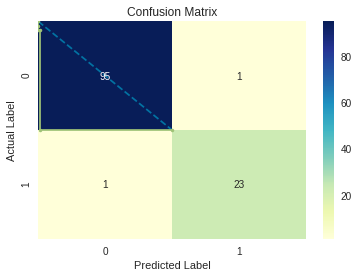

In [ ]:
import time 

start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


******AUC Curve********
AUC: 0.990


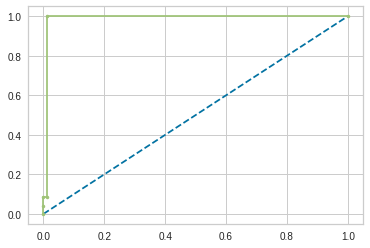

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

##### Random forest classifier

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': list(range(1, 10)), 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [2, 3, 5], 'criterion' :['gini', 'entropy']}
rfc = ensemble.RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train);
print(grid.best_estimator_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=2 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=2, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=3 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_es

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    9.9s finished


In [ ]:
print(grid.best_score_)

0.9625


--- 0.004197359085083008 seconds ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        96
         1.0       0.96      0.96      0.96        24

    accuracy                           0.98       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.98      0.98       120



Text(0.5, 15.0, 'Predicted Label')

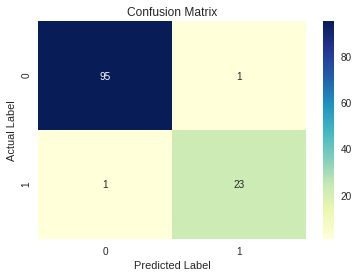

In [ ]:
import time 
start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

******AUC Curve********
AUC: 0.994


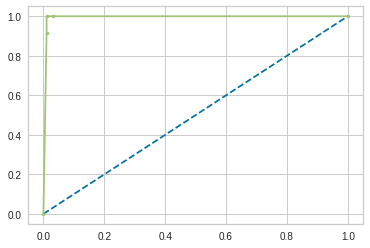

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

##### Logistic Regression

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['l1','l2', 'elasticnet', 'none']}
logReg = LogisticRegression()
grid=GridSearchCV(logReg, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    6.3s finished


In [ ]:
print(grid.best_score_)

0.9604166666666668


--- 0.0019273757934570312 seconds ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        96
         1.0       0.96      0.96      0.96        24

    accuracy                           0.98       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.98      0.98       120



Text(0.5, 15.0, 'Predicted Label')

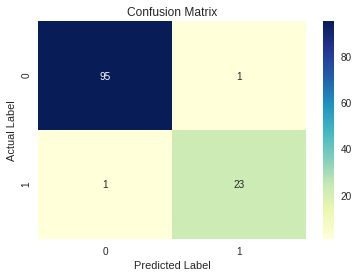

In [ ]:
import time 
start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

******AUC Curve********
AUC: 0.991


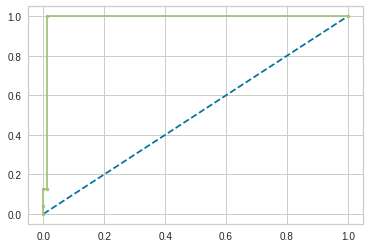

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

#####K nearest neighbour

In [ ]:
param_grid = {'n_neighbors': list(range(1, 31)), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':list(range(1, 10))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=distance ..
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=distance ..
[CV]  algorithm=brute, leaf_size=1, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=21, weights=distance ..
[CV]  algorithm=brute, 

[Parallel(n_jobs=1)]: Done 10800 out of 10800 | elapsed:  1.9min finished


In [ ]:
print(grid.best_score_)

0.9625


--- 0.013967514038085938 seconds ---
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        96
         1.0       0.96      1.00      0.98        24

    accuracy                           0.99       120
   macro avg       0.98      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Text(0.5, 15.0, 'Predicted Label')

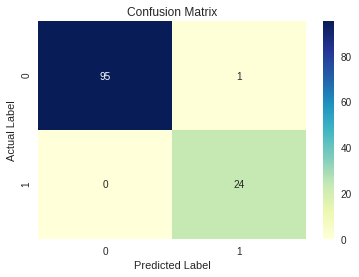

In [ ]:
import time 
start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

******AUC Curve********
AUC: 0.993


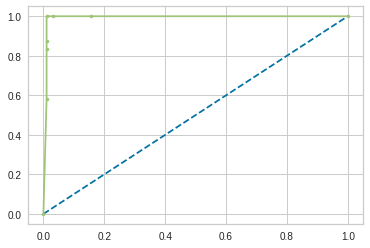

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion':['gini','entropy']}
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV] ..................... criterion=gini, max_depth=11, total=   0.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV] ..................... criterion=gini, max_depth=11, total=   0.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV] ..................... criterion=gini, max_depth=11, total=   0.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.3s finished


In [ ]:
print(grid.best_score_)

0.95


--- 0.0013680458068847656 seconds ---
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        92
         1.0       0.96      0.82      0.88        28

    accuracy                           0.95       120
   macro avg       0.95      0.91      0.93       120
weighted avg       0.95      0.95      0.95       120



Text(0.5, 15.0, 'Predicted Label')

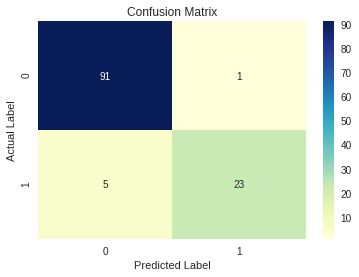

In [ ]:
import time 
start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

******AUC Curve********
AUC: 0.924


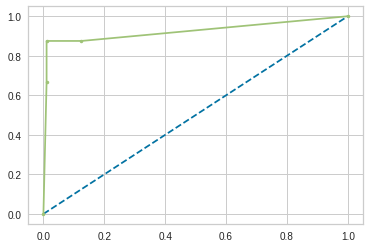

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

#### Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing':[1e-09]}
gnb = GaussianNB()
grid = GridSearchCV(gnb, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .............................. var_smoothing=1e-09, total=   0.0s
GaussianNB(priors=None, var_smoothing=1e-09)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
print(grid.best_score_)

0.9604166666666668


--- 0.0015778541564941406 seconds ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        96
         1.0       0.96      0.96      0.96        24

    accuracy                           0.98       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.98      0.98       120



Text(0.5, 15.0, 'Predicted Label')

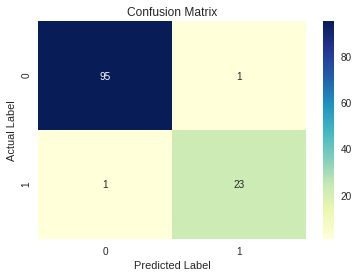

In [ ]:
import time 
start_time = time.time() 
grid_predictions = grid.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

******AUC Curve********
AUC: 0.953


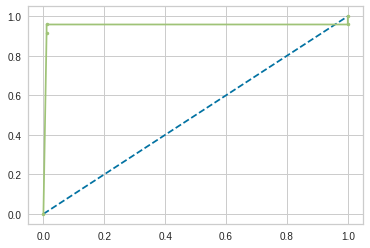

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print("******AUC Curve********")
p = grid.predict_proba(X_test)
probs=p[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

We can conclude that external testing is giving better result than k fold cross validation.

##  Dissimilarity Graphs

In [ ]:
class1=facebook.loc[facebook['Label']==0]
class2=facebook.loc[facebook['Label']==1]
class2

profile id  friends  following  community   age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0             1       39        300        907   200        1000        850            922   0.490            0.550            0.560       0.470         40             14        5.000       4.250         4.610      1
3             4       25        110        660   350        2050       2000           2050   0.976            1.000            0.700       0.300         54             21        5.857       5.714         5.857      1
4             5       24        100        150   800         950       1000            900   1.053            0.947            0.660       0.500         55             20        1.188       1.250         1.125      1
7             8       50        100        700   350        2512       2000           2400   0.796            0.955            0.770       0.320         58             32        7.177       5.714         6.857      1
379         381     1632       1765         54  1254         625         48            562   0.077            0.899            0.520       1.060         45             14        0.498       0.038         0.448      1
462         464     1159       1103         68  1156         625         61            611   0.098            0.978            0.478       1.260         42             17        0.541       0.053         0.529      1
465         467     1489       1325         69   956         562         53            546   0.094            0.972            0.492       1.260         40             13        0.588       0.055         0.571      1
475         477     1394       1153         58  1259         624         62            601   0.099            0.963            0.511       1.350         41             16        0.496       0.049         0.477      1
476         478     1257       1198         59  1562         681         68            627   0.100            0.921            0.498       1.220         39             17        0.436       0.044         0.401      1
477         479     1159       1030         51  1263         562         53            548   0.094            0.975            0.485       1.240         37             13        0.445       0.042         0.434      1
494         496     1326       1241         60  1120         543        154            524   0.284            0.965            0.364       1.110         36             14        0.485       0.138         0.468      1
495         497     1251       1207         59  1432         598         58            569   0.097            0.952            0.460       0.940         39             16        0.418       0.041         0.397      1
496         498     1473       1399         65  1106         524         54            509   0.103            0.971            0.571       0.910         38             15        0.474       0.049         0.460      1
499         501       54         62        759   952        2295        265           2095   0.115            0.913            0.562       0.230         43             28        2.411       0.278         2.201      1
501         503       54          3        598   748        1122       1005           1122   0.896            1.000            0.564       0.480         35             26        1.500       1.344         1.500      1
502         504       34         73        563   796        2001       1765           1988   0.882            0.994            0.569       0.483         47             21        2.514       2.217         2.497      1
503         505       23         49        684  1263        1846       1623           1832   0.879            0.992            0.568       0.482         45             24        1.462       1.285         1.451      1
504         506       47          5        692  2540        3742       2956           3654   0.790 

In [ ]:
df5 = pd.DataFrame( columns = ['profile id',	'friends',	'following',	'community',	'age',	'postshared',	'urlshared',	'photos/videos',	'fpurls',	'fpphotos/videos',	'avgcomment/post','likes/post'	,'tags/post'	,'Hashtags/post',	'avgpost/day',	'avgURL/day',	'avgphoto/day',	'Label'])
df5

Empty DataFrame
Columns: [profile id, friends, following, community, age, postshared, urlshared, photos/videos, fpurls, fpphotos/videos, avgcomment/post, likes/post, tags/post, Hashtags/post, avgpost/day, avgURL/day, avgphoto/day, Label]
Index: []

In [ ]:
print(len(facebook))

600


In [ ]:
df = df.append(class2.iloc[0], ignore_index = True)
df

profile id  friends  following  community      age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0         2.000  150.000    350.000     30.000  300.000     300.000    100.000        290.000   0.330            0.960            0.500       1.200     10.000          4.000        1.000       0.333         0.967  0.000
1         3.000  300.000    450.000     50.000  465.000     500.000    150.000        450.000   0.200            0.840            0.400       1.500     15.000          7.000        1.075       0.323         0.968  0.000
2         6.000  562.000    350.000     55.000  650.000     450.000    250.000        900.000   0.556            2.000            0.420       2.200     15.000         10.000        0.692       0.385         1.385  0.000
3         7.000  662.000    454.000     22.000  764.000     365.000    100.000       1000.000   0.274            2.740            0.310       2.500     23.000         10.000        0.478       0.131         1.309  0.000
4         9.000  800.000    550.000     66.000  850.000     460.000    500.000        300.000   1.087            0.652            0.400       2.000     23.000         10.000        0.541       0.588         0.353  0.000
..          ...      ...        ...        ...      ...         ...        ...            ...     ...              ...              ...         ...        ...            ...          ...         ...           ...    ...
622      87.000  954.000    524.000     69.000 1312.000     921.000     52.000        841.000   0.056            0.913            0.270       0.830     41.000         12.000        0.702       0.040         0.641  0.000
623      88.000  915.000   2042.000     74.000 1049.000     741.000     27.000        661.000   0.036            0.892            0.190       0.730     12.000          4.000        0.706       0.026         0.630  0.000
624      89.000  892.000   1469.000     54.000  981.000     648.000     26.000        564.000   0.040            0.870            0.560       0.760     17.000         10.000        0.661       0.027         0.575  0.000
625       1.000   39.000    300.000    907.000  200.000    1000.000    850.000        922.000   0.490            0.550            0.560       0.470     40.000         14.000        5.000       4.250         4.610  1.000
626       1.000   39.000    300.000    907.000  200.000    1000.000    850.000        922.000   0.490            0.550            0.560       0.470     40.000         14.000        5.000       4.250         4.610  1.000

[627 rows x 18 columns]

In [ ]:
# run once in a session if not results a whole datsete is redunant by appending.
k=1
c2=0
c1=0
for i in range(len(facebook)):
  if(i==(5*k) and c2<len(class2)):
    df5= df5.append(class2.iloc[c2], ignore_index = True)
    c2=c2+1
    k=k+1
  elif(c1<len(class1)):
    df5= df5.append(class1.iloc[c1], ignore_index = True)
    c1=c1+1
  else:
    print(facebook.iloc[i])


In [ ]:
len(df5)
df5.head(20)

profile id  friends  following  community      age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  Hashtags/post  avgpost/day  avgURL/day  avgphoto/day  Label
0        2.000  150.000    350.000     30.000  300.000     300.000    100.000        290.000   0.330            0.960            0.500       1.200     10.000          4.000        1.000       0.333         0.967  0.000
1        3.000  300.000    450.000     50.000  465.000     500.000    150.000        450.000   0.200            0.840            0.400       1.500     15.000          7.000        1.075       0.323         0.968  0.000
2        6.000  562.000    350.000     55.000  650.000     450.000    250.000        900.000   0.556            2.000            0.420       2.200     15.000         10.000        0.692       0.385         1.385  0.000
3        7.000  662.000    454.000     22.000  764.000     365.000    100.000       1000.000   0.274            2.740            0.310       2.500     23.000         10.000        0.478       0.131         1.309  0.000
4        9.000  800.000    550.000     66.000  850.000     460.000    500.000        300.000   1.087            0.652            0.400       2.000     23.000         10.000        0.541       0.588         0.353  0.000
5        1.000   39.000    300.000    907.000  200.000    1000.000    850.000        922.000   0.490            0.550            0.560       0.470     40.000         14.000        5.000       4.250         4.610  1.000
6       10.000  605.000    555.000     58.000  782.000     700.000    100.000        650.000   0.143            0.929            0.240       2.800     13.000          5.000        0.895       0.128         0.831  0.000
7       11.000 1005.000    380.000     13.000 1250.000     561.000    132.000        530.000   0.235            0.945            0.100       1.600     16.000          4.000        0.449       0.106         0.424  0.000
8       12.000 1632.000    560.000     84.000  651.000     789.000     87.000        760.000   0.110            0.963            0.460       1.900     35.000         12.000        1.212       0.134         1.167  0.000
9       13.000 2461.000    643.000     63.000 1523.000     756.000    123.000        713.000   0.163            0.943            0.460       2.800     13.000         17.000        0.496       0.081         0.468  0.000
10       4.000   25.000    110.000    660.000  350.000    2050.000   2000.000       2050.000   0.976            1.000            0.700       0.300     54.000         21.000        5.857       5.714         5.857  1.000
11      14.000  561.000    312.000     46.000  625.000     326.000     65.000        300.000   0.199            0.920            0.350       2.300     32.000         15.000        0.522       0.104         0.480  0.000
12      15.000 1143.000    426.000     86.000  956.000     558.000     56.000        500.000   0.100            0.896            0.240       2.100     15.000         19.000        0.584       0.059         0.523  0.000
13      16.000  784.000    466.000     46.000  423.000     326.000     32.000        300.000   0.098            0.920            0.260       2.500     18.000         12.000        0.771       0.076         0.709  0.000
14      17.000  146.000     56.000     13.000  125.000      76.000     23.000         65.000   0.303            0.855            0.350       1.300     19.000         19.000        0.608       0.184         0.520  0.000
15       5.000   24.000    100.000    150.000  800.000     950.000   1000.000        900.000   1.053            0.947            0.660       0.500     55.000         20.000        1.188       1.250         1.125  1.000
16      18.000  894.000    465.000    123.000  565.000     420.000     63.000        400.000   0.150            0.952            0.482       1.000     25.000         11.000        0.743       0.112         0.708  0.000
17      19.000  463.000    143.000     32.000  421.000     186

In [ ]:
df5 = df5.rename(columns={'Hashtags/post':'t1'})
df5 = df5.rename(columns={'profile id':'p'})
df5

p  friends  following  community      age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post     t1  avgpost/day  avgURL/day  avgphoto/day  Label
0     2.000  150.000    350.000     30.000  300.000     300.000    100.000        290.000   0.330            0.960            0.500       1.200     10.000  4.000        1.000       0.333         0.967  0.000
1     3.000  300.000    450.000     50.000  465.000     500.000    150.000        450.000   0.200            0.840            0.400       1.500     15.000  7.000        1.075       0.323         0.968  0.000
2     6.000  562.000    350.000     55.000  650.000     450.000    250.000        900.000   0.556            2.000            0.420       2.200     15.000 10.000        0.692       0.385         1.385  0.000
3     7.000  662.000    454.000     22.000  764.000     365.000    100.000       1000.000   0.274            2.740            0.310       2.500     23.000 10.000        0.478       0.131         1.309  0.000
4     9.000  800.000    550.000     66.000  850.000     460.000    500.000        300.000   1.087            0.652            0.400       2.000     23.000 10.000        0.541       0.588         0.353  0.000
..      ...      ...        ...        ...      ...         ...        ...            ...     ...              ...              ...         ...        ...    ...          ...         ...           ...    ...
595 570.000   36.000     91.000   1247.000  826.000    1876.000   1420.000       1873.000   0.757            0.998            0.625       0.220     38.000 23.000        2.271       1.719         2.268  0.000
596 591.000   83.000      2.000    789.000 1487.000    2456.000   1756.000       2450.000   0.715            0.998            1.000       0.480     49.000 25.000        1.652       1.181         1.648  0.000
597 594.000  106.000      5.000   1460.000 1148.000    2165.000   1324.000       2159.000   0.612            0.997            0.911       0.330     41.000 24.000        1.886       1.153         1.881  0.000
598 600.000  100.000     26.000   1500.000  800.000    1876.000   1320.000       1874.000   0.704            0.999            1.000       0.102     46.000 21.000        2.345       1.650         2.342  0.000
599 601.000   25.000     17.000    730.000 1560.000    2002.000   1546.000       2000.000   0.772            0.999            0.800       0.150     52.000 27.000        1.283       0.991         1.282  0.000

[600 rows x 18 columns]

In [ ]:
df5['i'] = range(1, len(df5) + 1)
df5

p  friends  following  community      age  postshared  urlshared  photos/videos  fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post     t1  avgpost/day  avgURL/day  avgphoto/day  Label    i
0     2.000  150.000    350.000     30.000  300.000     300.000    100.000        290.000   0.330            0.960            0.500       1.200     10.000  4.000        1.000       0.333         0.967  0.000    1
1     3.000  300.000    450.000     50.000  465.000     500.000    150.000        450.000   0.200            0.840            0.400       1.500     15.000  7.000        1.075       0.323         0.968  0.000    2
2     6.000  562.000    350.000     55.000  650.000     450.000    250.000        900.000   0.556            2.000            0.420       2.200     15.000 10.000        0.692       0.385         1.385  0.000    3
3     7.000  662.000    454.000     22.000  764.000     365.000    100.000       1000.000   0.274            2.740            0.310       2.500     23.000 10.000        0.478       0.131         1.309  0.000    4
4     9.000  800.000    550.000     66.000  850.000     460.000    500.000        300.000   1.087            0.652            0.400       2.000     23.000 10.000        0.541       0.588         0.353  0.000    5
..      ...      ...        ...        ...      ...         ...        ...            ...     ...              ...              ...         ...        ...    ...          ...         ...           ...    ...  ...
595 570.000   36.000     91.000   1247.000  826.000    1876.000   1420.000       1873.000   0.757            0.998            0.625       0.220     38.000 23.000        2.271       1.719         2.268  0.000  596
596 591.000   83.000      2.000    789.000 1487.000    2456.000   1756.000       2450.000   0.715            0.998            1.000       0.480     49.000 25.000        1.652       1.181         1.648  0.000  597
597 594.000  106.000      5.000   1460.000 1148.000    2165.000   1324.000       2159.000   0.612            0.997            0.911       0.330     41.000 24.000        1.886       1.153         1.881  0.000  598
598 600.000  100.000     26.000   1500.000  800.000    1876.000   1320.000       1874.000   0.704            0.999            1.000       0.102     46.000 21.000        2.345       1.650         2.342  0.000  599
599 601.000   25.000     17.000    730.000 1560.000    2002.000   1546.000       2000.000   0.772            0.999            0.800       0.150     52.000 27.000        1.283       0.991         1.282  0.000  600

[600 rows x 19 columns]

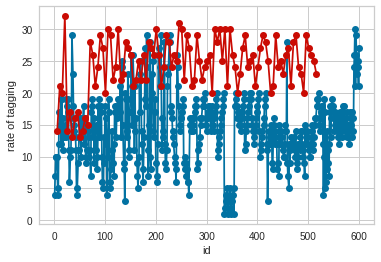

In [ ]:
idx_0 = np.where(df5.Label == 0.000)
idx_1 = np.where(df5.Label == 1.000)
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].t1,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].t1,  c='r', marker="o", label='spam')
plt.ylabel('rate of tagging')
plt.xlabel('id')
plt.show()

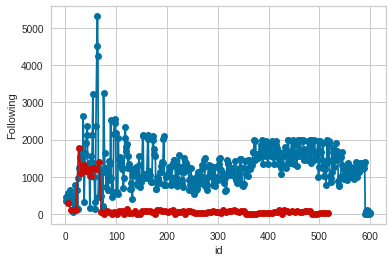

In [ ]:
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].following,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].following,  c='r', marker="o", label='spam')
plt.ylabel('Following')
plt.xlabel('id')
plt.show()

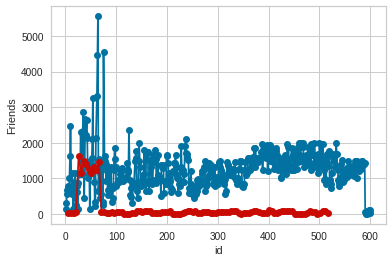

In [ ]:
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].friends,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].friends,  c='r', marker="o", label='spam')
plt.ylabel('Friends')
plt.xlabel('id')
plt.show()

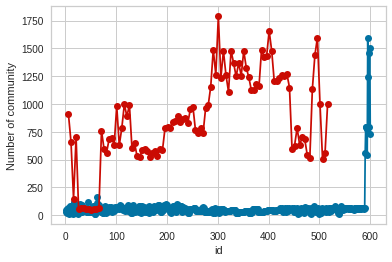

In [ ]:
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].community,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].community,  c='r', marker="o", label='spam')
plt.ylabel('Number of community')
plt.xlabel('id')
plt.show()

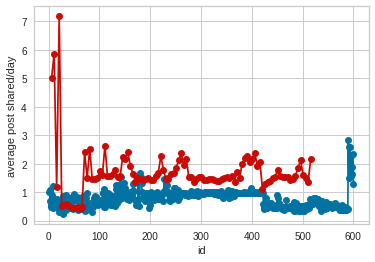

In [ ]:
df5 = df5.rename(columns={'avgpost/day':'a1'})
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].a1,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].a1,  c='r', marker="o", label='spam')
plt.ylabel('average post shared/day')
plt.xlabel('id')
plt.show()

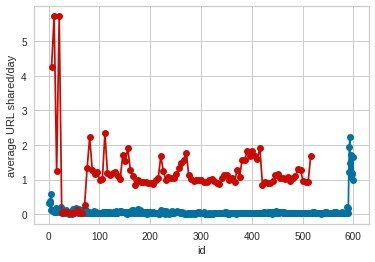

In [ ]:
df5 = df5.rename(columns={'avgURL/day':'a2'})
plt.plot(df5.iloc[idx_0].i, df5.iloc[idx_0].a2,  c='b', marker="o", label='legit')
plt.plot(df5.iloc[idx_1].i, df5.iloc[idx_1].a2,  c='r', marker="o", label='spam')
plt.ylabel('average URL shared/day')
plt.xlabel('id')
plt.show()

## Thank you